#  LASSO Regression Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sidetable

In [5]:
pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from feature_engine.outliers import Winsorizer

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
import joblib
import pickle

In [8]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [9]:
# Assuming you uploaded a CSV file
df = pd.read_csv('50_Startups (1).csv')

In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.isnull().any()

,0
R&D Spend,False
Administration,False
Marketing Spend,False
State,False
Profit,False


In [13]:
X = pd.DataFrame(df.iloc[: , 0:4])
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [14]:
y = pd.DataFrame(df.iloc[:,4])
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [15]:
X['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
X['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [17]:
# Build a frequency table using sidetable library

X.stb.freq(["State"])

,State,count,percent,cumulative_count,cumulative_percent
0,New York,17,34.0,17,34.0
1,California,17,34.0,34,68.0
2,Florida,16,32.0,50,100.0


In [18]:
# Segregating Non-Numeric features

categorical_features = X.select_dtypes(include = 'object').columns
print(categorical_features)

Index(['State'], dtype='object')


In [22]:
# Segregating Numeric features

numeric_features = X.select_dtypes(exclude = 'object').columns
print(numeric_features)

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')


In [23]:
## Missing values Analysis
# Define pipeline for missing data if any


num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])

preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])


In [24]:
# Fit the imputation pipeline to input features

imputation = preprocessor.fit(X)

In [25]:
# Save the pipeline

joblib.dump(imputation, 'meanimpute')

['meanimpute']

In [26]:
# Transformed data

cleandata = pd.DataFrame(imputation.transform(X), columns = numeric_features)
cleandata.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


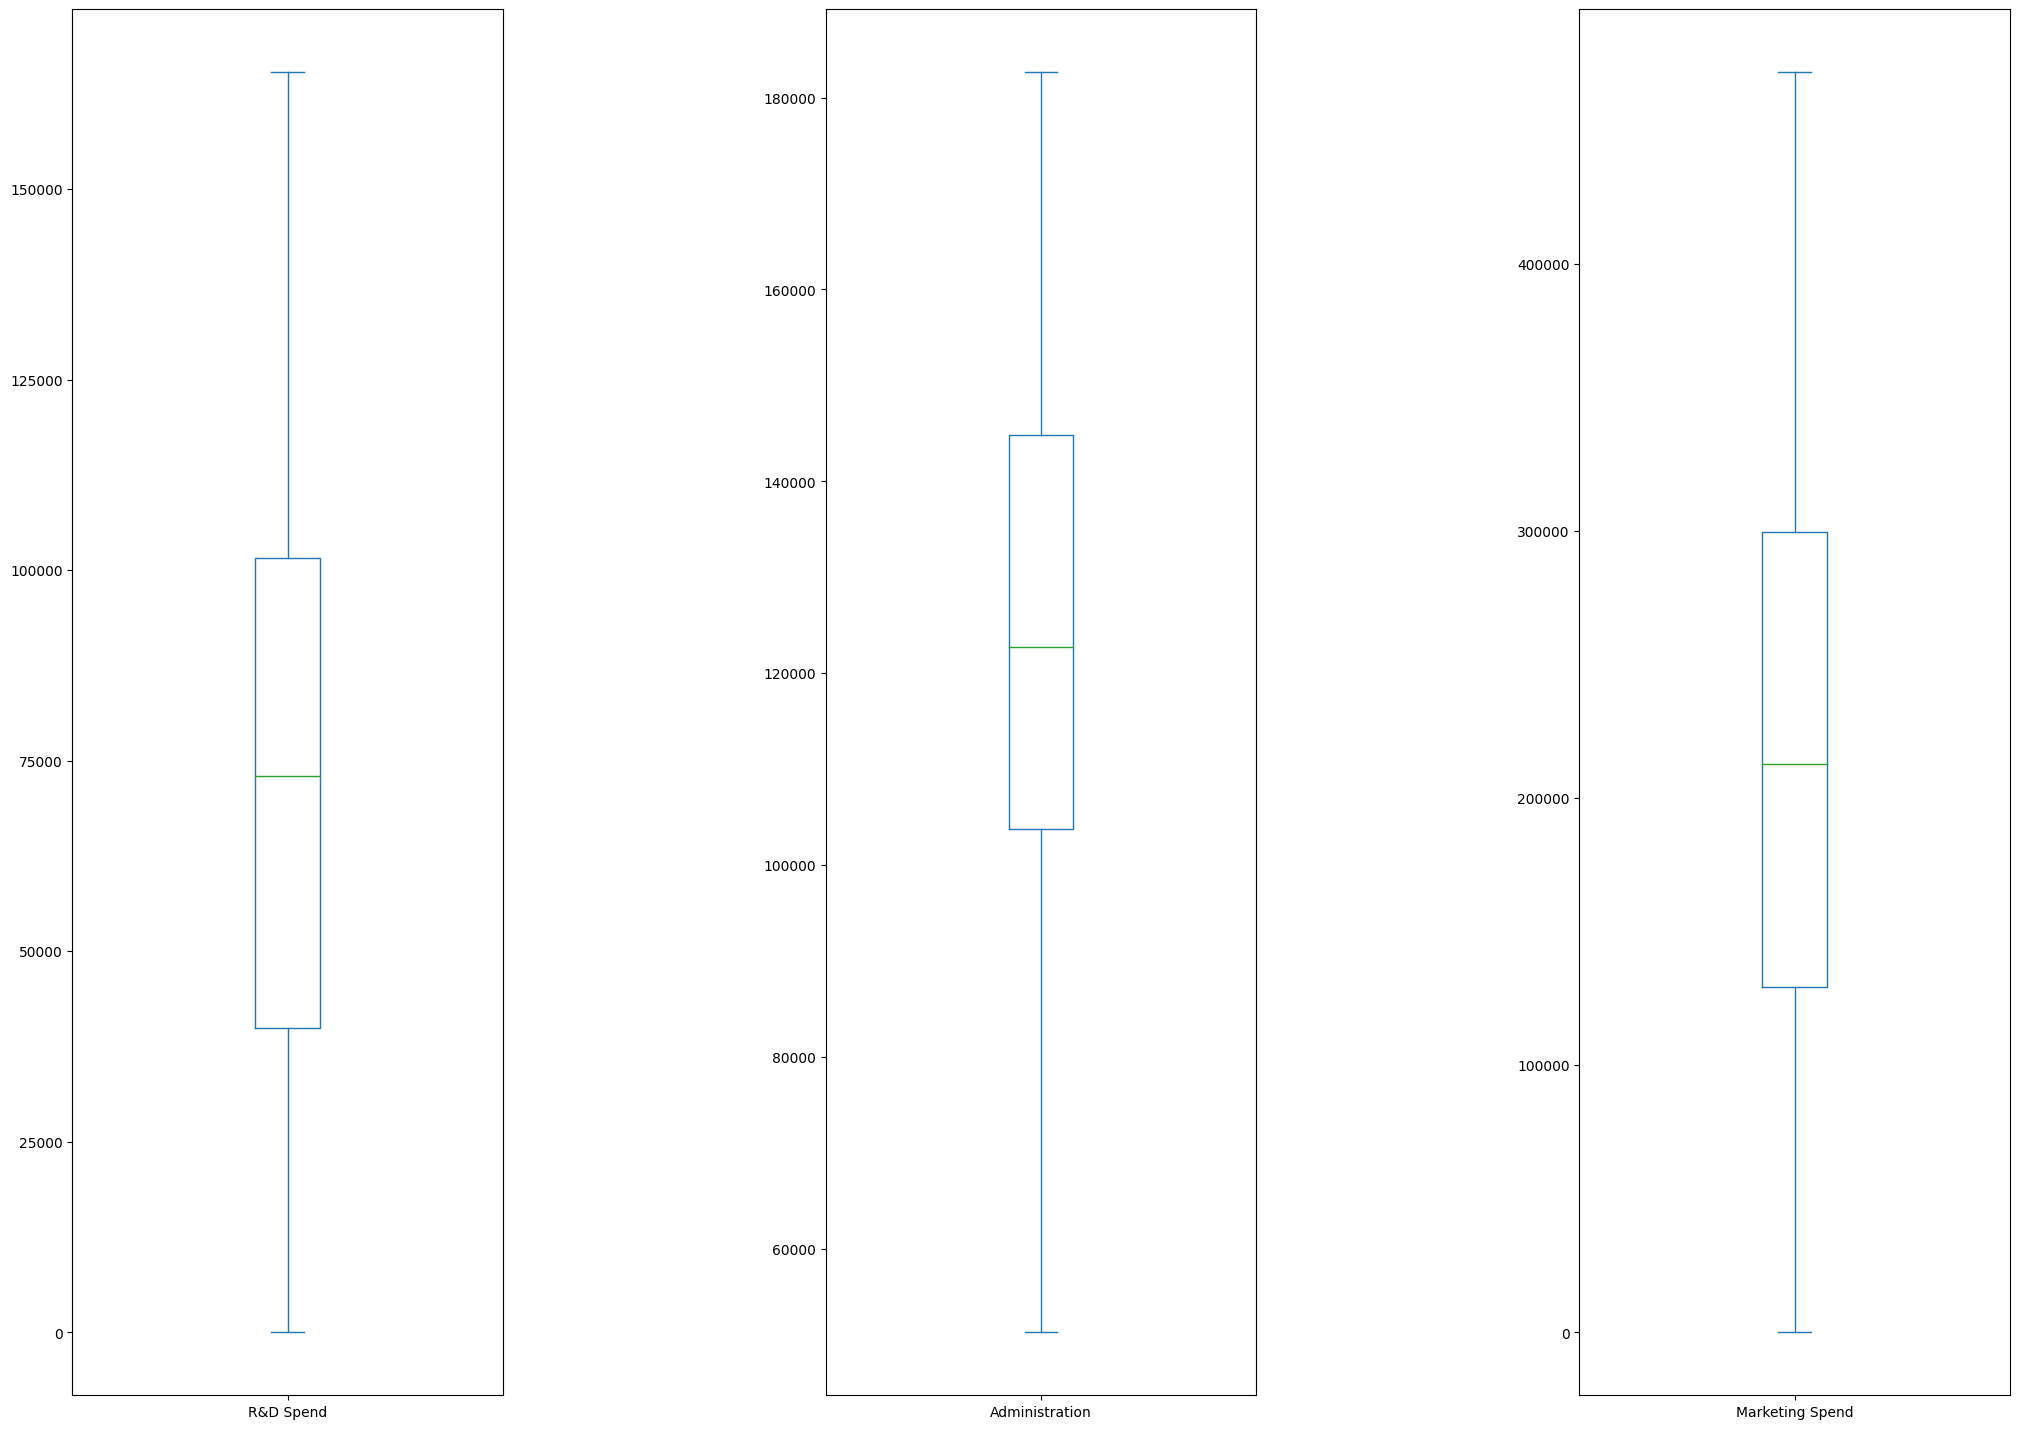

In [27]:
# pandas plot() function with parameters kind = 'box' and subplots = True

X.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18))

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''

# Increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [28]:
# Winsorization for outlier treatment

winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both',    # cap left, right or both tails
                          fold = 1.5,
                          variables = list(cleandata.columns))

winsor

clean = winsor.fit(cleandata)

# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [29]:
cleandata1 = pd.DataFrame(clean.transform(cleandata), columns = numeric_features)

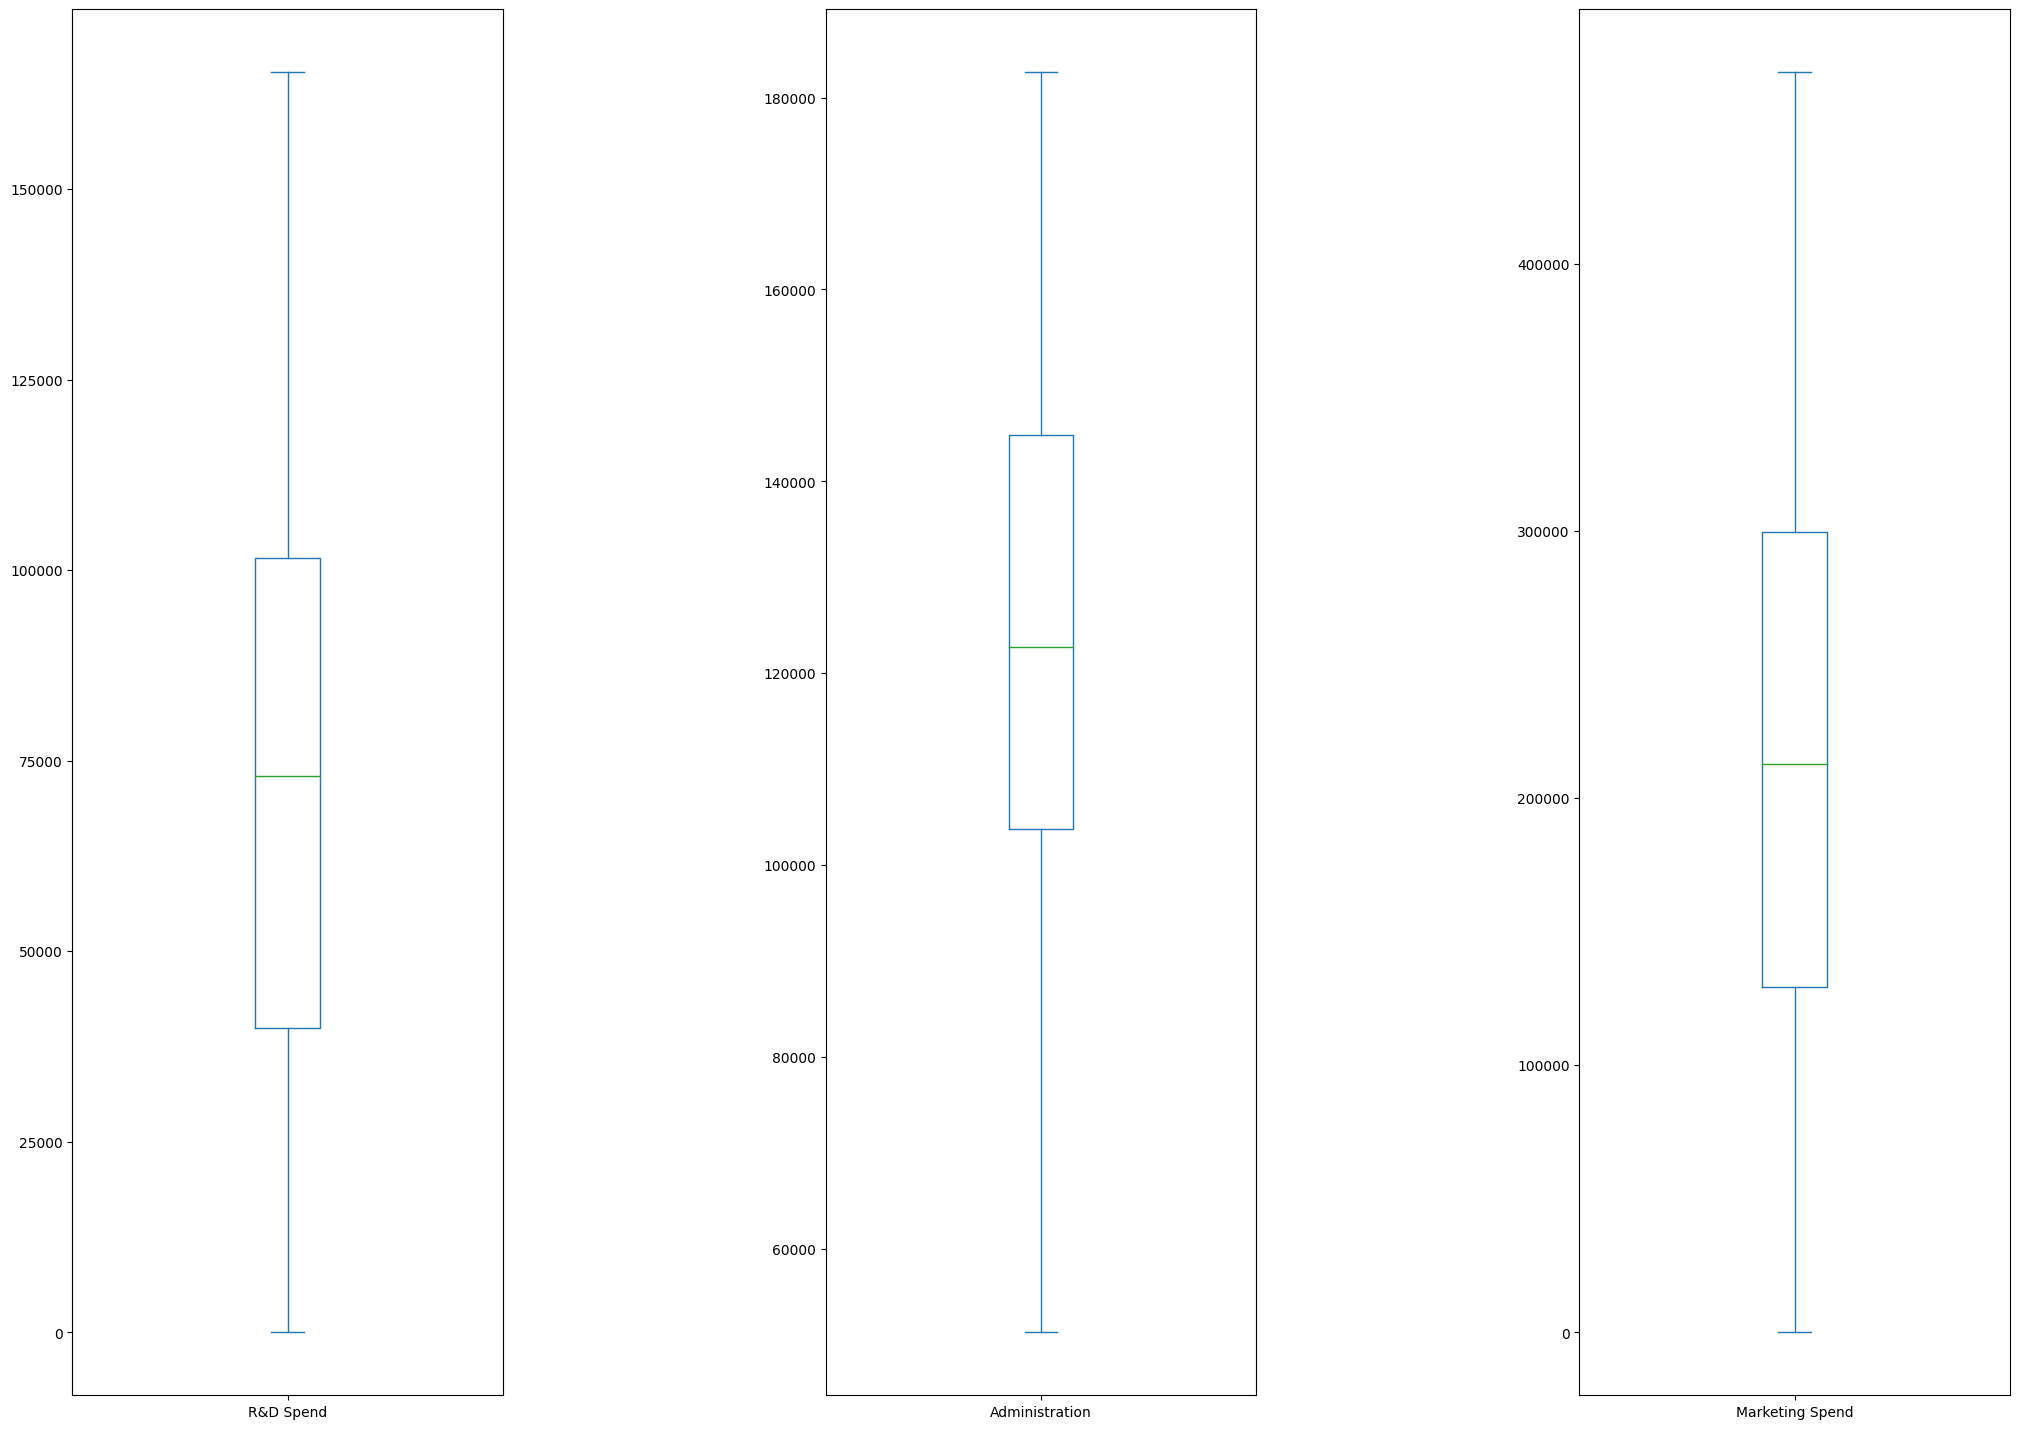

In [30]:
# Boxplot

cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18))
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [31]:
# Scaling
## Scaling with MinMaxScaler

scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(cleandata1)


In [32]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [33]:
scaled_data = pd.DataFrame(scale.transform(cleandata1), columns = numeric_features)
scaled_data.describe()

,R&D Spend,Administration,Marketing Spend
count,50.000000,50.000000,50.000000
mean,0.445854,0.533345,0.447292
std,0.277608,0.213286,0.259208
min,0.000000,0.000000,0.000000
25%,0.241527,0.399260,0.274066
50%,0.441799,0.543661,0.450876
75%,0.614474,0.712221,0.634759
max,1.000000,1.000000,1.000000


In [34]:
## Encoding
# Categorical features

encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)   # Works with categorical features only


In [35]:
# Save the encoding model

joblib.dump(clean, 'encoding')


['encoding']

In [36]:
# Transform the data using the fitted pipeline

encoded_data = clean.transform(X)


In [37]:
# Convert the encoded data to a DataFrame

encode_data = pd.DataFrame(encoded_data, columns=clean.get_feature_names_out(input_features=X.columns))


In [38]:
# Display information about the encoded DataFrame

encode_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categorical__State_California  50 non-null     float64
 1   categorical__State_Florida     50 non-null     float64
 2   categorical__State_New York    50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [39]:
# Assuming scaled_data is already defined and corresponds to your numerical features
# Concatenate the numerical features and the encoded categorical features

clean_data = pd.concat([scaled_data, encode_data], axis=1)

In [40]:
# Display information about the concatenated DataFrame

clean_data.info()
clean_data.describe().T  # Transposed view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   R&D Spend                      50 non-null     float64
 1   Administration                 50 non-null     float64
 2   Marketing Spend                50 non-null     float64
 3   categorical__State_California  50 non-null     float64
 4   categorical__State_Florida     50 non-null     float64
 5   categorical__State_New York    50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,0.445854,0.277608,0.0,0.241527,0.441799,0.614474,1.0
Administration,50.0,0.533345,0.213286,0.0,0.399260,0.543661,0.712221,1.0
Marketing Spend,50.0,0.447292,0.259208,0.0,0.274066,0.450876,0.634759,1.0
categorical__State_California,50.0,0.340000,0.478518,0.0,0.000000,0.000000,1.000000,1.0
categorical__State_Florida,50.0,0.320000,0.471212,0.0,0.000000,0.000000,1.000000,1.0
categorical__State_New York,50.0,0.340000,0.478518,0.0,0.000000,0.000000,1.000000,1.0


In [41]:
# Library to call OLS model
# import statsmodels.api as sm

# Build a vanilla model on full dataset

# By default, statsmodels fits a line passing through the origin, i.e. it
# doesn't fit an intercept. Hence, you need to use the command 'add_constant'
# so that it also fits an intercept

P = add_constant(clean_data)
basemodel = sm.OLS(y, P).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.34e-27
Time:                        09:09:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          3.659e+04   3354.540     10.909      0.000    2.98e+04    4.34e+04
R&D Spend                      1.333e+05   7673.355     17.369      0.000    1.18e+05    1.49e+05
Administration                -3547.3528   6861.263     -0.517      0.608   -1.74e+04    1.03e+04
Marketing Spend                1.273e+04   8087.397      1.574      0.123   -3570.409     2.9e+04
categorical__State_California  1.215e+04   2102.952      5.776      0.000    7907.672    1.64e+04
categorical__State_Florida     1.234e+04   2388.628      5.168      0.000    7530.719    1.72e+04
categorical__State_New York     1.21e+04   2158.898      5.607      0.000    7753.034    1.65e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# p-values of coefficients found to be insignificant due to colinearity

# Identify the variale with highest colinearity using Variance Inflation factor (VIF)
# Variance Inflation Factor (VIF)
# Assumption: VIF > 10 = colinearity
# VIF on clean Data

vif = pd.Series([variance_inflation_factor(P.values, i) for i in range(P.shape[1])], index = P.columns)
vif

# inf = infinity

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,0
const,0.000000
R&D Spend,2.495511
Administration,1.177766
Marketing Spend,2.416797
categorical__State_California,inf
categorical__State_Florida,inf
categorical__State_New York,inf


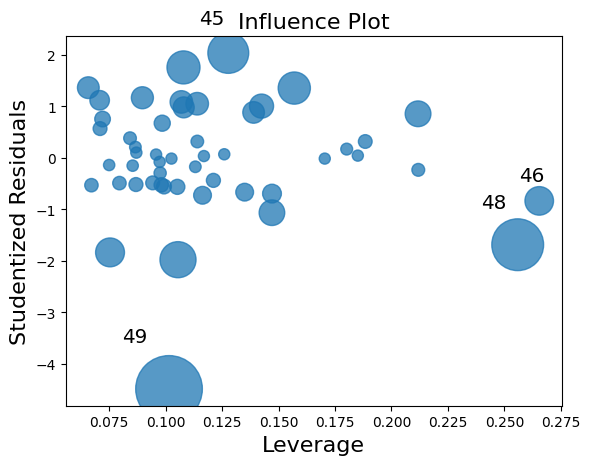

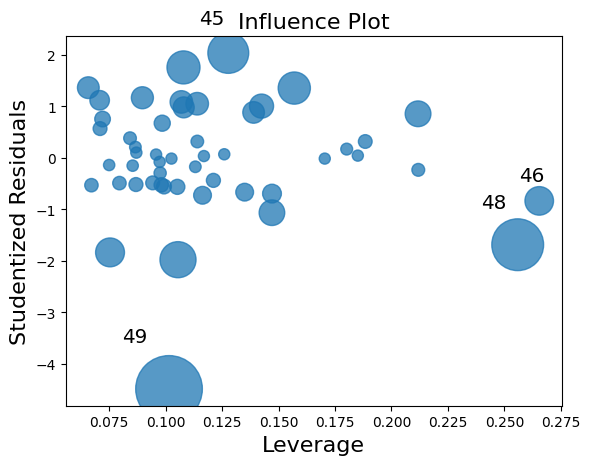

In [43]:
# Tune the model by verifying for influential observations

sm.graphics.influence_plot(basemodel)

In [44]:
from sklearn.linear_model import Lasso
#help(Lasso)

lasso = Lasso(alpha = 0.13)

lasso.fit(clean_data, y)


Lasso(alpha=0.13)

In [45]:
# Coefficient values for all independent variables#
lasso.intercept_

array([48739.40752811])

In [46]:
lasso.coef_

array([ 1.33272663e+05, -3.54359731e+03,  1.27289855e+04, -0.00000000e+00,
        1.98530854e+02, -4.13763643e+01])

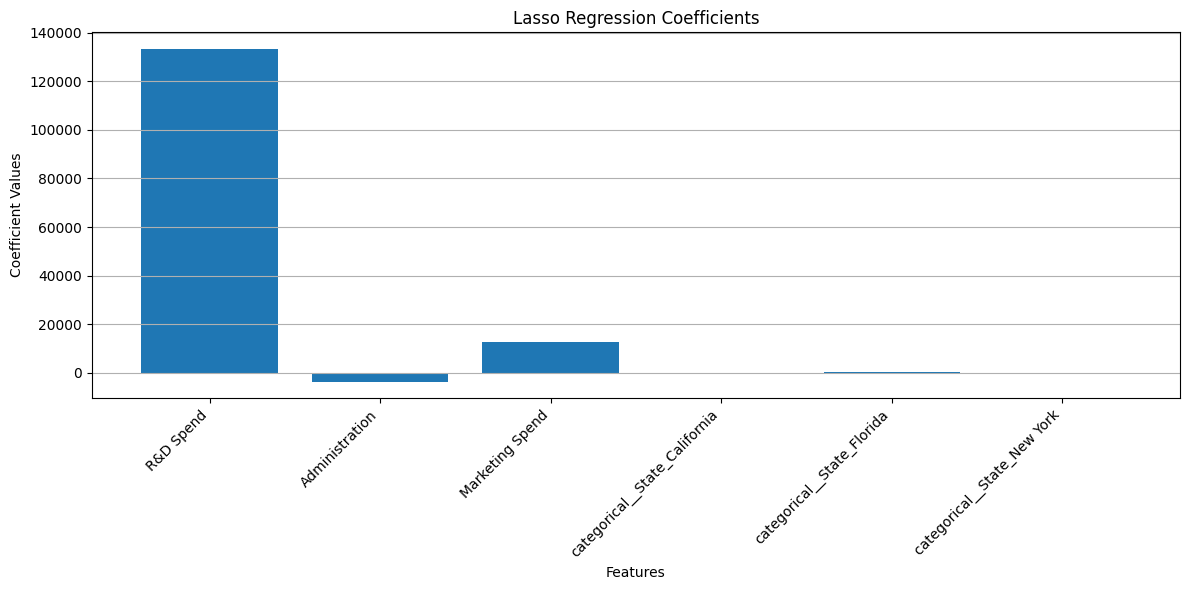

In [47]:
# Create the bar plot

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(x=pd.Series(clean_data.columns), height=pd.Series(lasso.coef_))

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Lasso Regression Coefficients')

# Add grid lines for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

In [48]:
# Create a function called lasso

pred_lasso = lasso.predict(clean_data)

# Adjusted r-square

s1 = lasso.score(clean_data, y['Profit'])
s1


0.9507524837776524

In [49]:
# RMSE

np.sqrt(np.mean((pred_lasso - np.array(y['Profit']))**2))

8854.761079566651